**TPOS DE ANÁLISE ESTATÍSTICA**


In [ ]:
!pip install vaderSentiment
!pip pandas
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Dados fictícios das postagens em redes sociais
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Postagem': [
        "Adorei a nova promoção de hambúrguer! 🍔❤️",
        "O atendimento hoje no drive-thru foi horrível! 😡",
        "Essa batata frita está uma delícia! 🍟😋",
        "O lanche chegou frio e sem molho, péssima experiência! 😞",
        "Não recomendo, o hambúrguer estava queimado e sem sabor. 😒",
        "Finalmente experimentei o novo milk-shake de chocolate, simplesmente divino!",
        "Hambúrguer vegano muito saboroso! 🌱🍔 #vegano #saudável",
        "Nunca mais volto nesse lugar, o serviço é péssimo! 😠",
        "O combo que pedi veio super rápido e quentinho, ótimo serviço! 👍🏼",
        "As porções estão cada vez menores, não vale o preço cobrado. 😕"
    ]
}

# Converter dados em DataFrame
df = pd.DataFrame(data)

# Inicializar o analisador de sentimentos
analyzer = SentimentIntensityAnalyzer()

# Função para realizar a análise de sentimento
def analyze_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'positivo'
    elif sentiment_score['compound'] <= -0.05:
        return 'negativo'
    else:
        return 'neutro'

# Aplicar a função de análise de sentimento aos dados
df['Sentimento'] = df['Postagem'].apply(analyze_sentiment)

# Exibir o DataFrame com a classificação de sentimento
print(df[['Postagem', 'Sentimento']])

                                            Postagem Sentimento
0          Adorei a nova promoção de hambúrguer! 🍔❤️     neutro
1   O atendimento hoje no drive-thru foi horrível! 😡   negativo
2             Essa batata frita está uma delícia! 🍟😋     neutro
3  O lanche chegou frio e sem molho, péssima expe...   negativo
4  Não recomendo, o hambúrguer estava queimado e ...     neutro
5  Finalmente experimentei o novo milk-shake de c...     neutro
6  Hambúrguer vegano muito saboroso! 🌱🍔 #vegano #...     neutro
7  Nunca mais volto nesse lugar, o serviço é péss...   negativo
8  O combo que pedi veio super rápido e quentinho...   positivo
9  As porções estão cada vez menores, não vale o ...   negativo


In [ ]:

import pandas as pd
import numpy as np
import random

# Configuração para geração de dados
np.random.seed(42)
random.seed(42)

# Dados de exemplo
produtos = ['Cerveja', 'Refrigerante', 'Suco', 'Água', 'Vinho']
tipos_bebida = ['Alcoolica', 'Nao Alcoolica', 'Nao Alcoolica', 'Nao Alcoolica', 'Alcoolica']
locais_lojas = ['Centro', 'Zona Norte', 'Zona Sul', 'Zona Oeste']

# Função para gerar dados fictícios
def gerar_dados_fabricacao(n_lojas, n_meses):
    data = []
    for loja in range(n_lojas):
        for mes in range(n_meses):
            for produto, tipo in zip(produtos, tipos_bebida):
                vendas = np.random.randint(50, 500)
                preco = round(np.random.uniform(1.0, 20.0), 2)
                tempo_no_site = np.random.randint(1, 10)
                paginas_visitadas = np.random.randint(5, 20)
                temperatura = round(np.random.uniform(15.0, 35.0), 1)
                local = random.choice(locais_lojas)
                data.append([produto, vendas, preco, tipo, tempo_no_site, paginas_visitadas, local, temperatura, mes+1])
    return pd.DataFrame(data, columns=['Produto', 'Numero_Vendas', 'Preco_Bebida', 'Tipo_Bebida', 'Tempo_no_Site', 'Paginas_Visitadas', 'Localizacao_Loja', 'Temperatura_Media_Mes', 'Mes'])

# Gerando dados para 10 lojas e 12 meses
df = gerar_dados_fabricacao(10, 12)

# Exibir o DataFrame
display(df.head())

,Produto,Numero_Vendas,Preco_Bebida,Tipo_Bebida,Tempo_no_Site,Paginas_Visitadas,Localizacao_Loja,Temperatura_Media_Mes,Mes
0,Cerveja,152,16.13,Alcoolica,8,17,Centro,26.9,1
1,Refrigerante,171,3.96,Nao Alcoolica,8,9,Centro,27.0,1
2,Suco,201,13.37,Nao Alcoolica,5,6,Zona Sul,29.4,1
3,Água,463,5.03,Nao Alcoolica,5,5,Zona Norte,21.1,1
4,Vinho,71,1.13,Alcoolica,9,5,Zona Norte,25.5,1


In [ ]:

# Estatística Descritiva
estatisticas = df.describe()
display("Estatísticas Descritivas:\n", estatisticas)

'Estatísticas Descritivas:\n'

,Numero_Vendas,Preco_Bebida,Tempo_no_Site,Paginas_Visitadas,Temperatura_Media_Mes,Mes
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,282.151667,10.360000,4.943333,11.686667,25.248500,6.500000
std,129.660216,5.423991,2.620095,4.373828,5.708556,3.454933
min,50.000000,1.000000,1.000000,5.000000,15.000000,1.000000
25%,179.000000,5.655000,3.000000,8.000000,20.475000,3.750000
50%,284.000000,10.435000,5.000000,11.500000,25.400000,6.500000
75%,395.000000,14.677500,7.000000,16.000000,30.225000,9.250000
max,499.000000,19.950000,9.000000,19.000000,34.900000,12.000000


In [47]:

# Análise de Correlação
correlacao = df[['Numero_Vendas', 'Preco_Bebida', 'Tempo_no_Site', 'Paginas_Visitadas', 'Temperatura_Media_Mes']].corr()
display("\nMatriz de Correlação:\n", correlacao)

'\nMatriz de Correlação:\n'

,Numero_Vendas,Preco_Bebida,Tempo_no_Site,Paginas_Visitadas,Temperatura_Media_Mes
Numero_Vendas,1.000000,0.057662,-0.056747,-0.073385,0.020956
Preco_Bebida,0.057662,1.000000,0.017340,0.017307,0.024496
Tempo_no_Site,-0.056747,0.017340,1.000000,0.045075,-0.016140
Paginas_Visitadas,-0.073385,0.017307,0.045075,1.000000,0.003959
Temperatura_Media_Mes,0.020956,0.024496,-0.016140,0.003959,1.000000


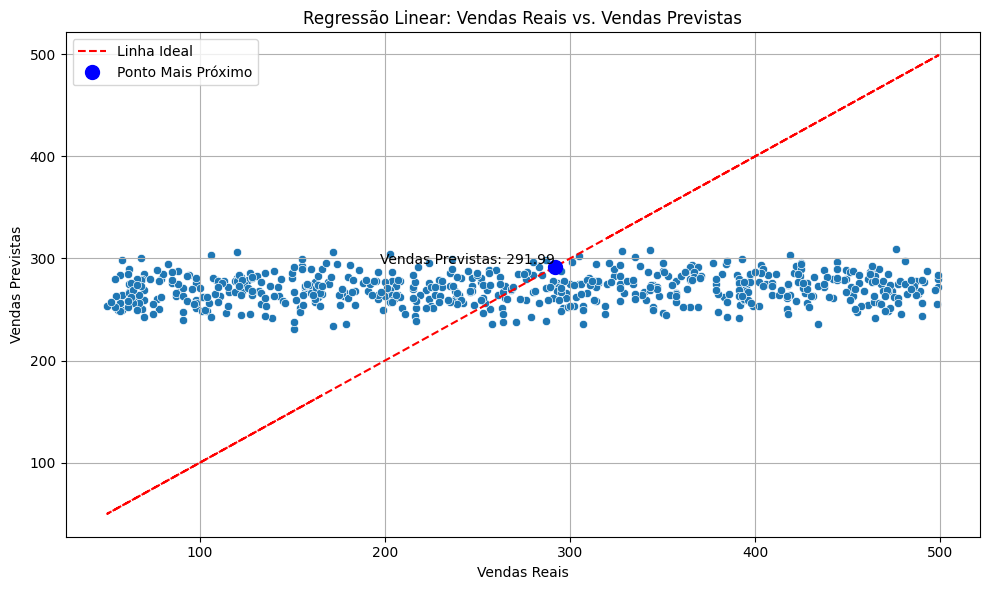

In [46]:

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Utilizando o DataFrame existente
# Supondo que você já tenha um DataFrame df com os dados de vendas e outras variáveis

# Selecionando variáveis para a regressão
X = df[['Preco_Bebida', 'Tempo_no_Site', 'Paginas_Visitadas', 'Temperatura_Media_Mes']]
y = df['Numero_Vendas']

# Adicionando uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Criando o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Prevendo os valores de venda usando o modelo
y_pred = modelo.predict(X)

# Plotando o gráfico de dispersão com a linha de regressão
plt.figure(figsize=(10, 6))

# Gráfico de dispersão dos dados reais
sns.scatterplot(x=y, y=y_pred)
plt.xlabel('Vendas Reais')
plt.ylabel('Vendas Previstas')
plt.title('Regressão Linear: Vendas Reais vs. Vendas Previstas')

# Plotando a linha de regressão
plt.plot(y, y, color='red', linestyle='--', label='Linha Ideal')  # linha diagonal para referência de comparação

# Encontrando o ponto mais próximo da linha ideal
residuos = y - y_pred
indice_ponto_proximo = np.argmin(np.abs(residuos))
valor_x = y.iloc[indice_ponto_proximo]
valor_y = y_pred.iloc[indice_ponto_proximo]

# Plotando o ponto mais próximo da linha ideal
plt.plot(valor_x, valor_y, marker='o', markersize=10, linestyle='None', color='blue', label='Ponto Mais Próximo')

# Exibindo o valor de venda previsto no ponto mais próximo da linha ideal
plt.text(valor_x, valor_y, f'Vendas Previstas: {valor_y:.2f}', color='black', ha='right', va='bottom')

# Adicionando legenda e grade
plt.legend()
plt.grid(True)

# Ajustando o layout para melhor visualização
plt.tight_layout()

# Exibindo o gráfico
plt.show()

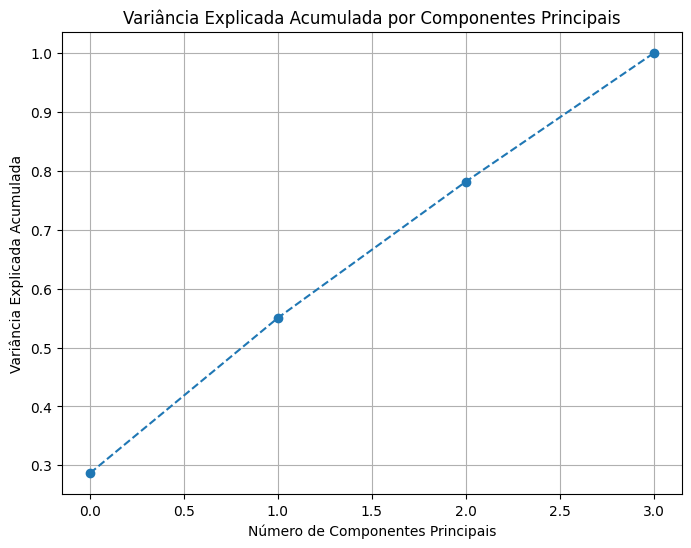


Componentes Principais:
   Preco_Bebida  Tempo_no_Site  Paginas_Visitadas  Temperatura_Media_Mes
0     -0.517813       0.539477          -0.572430               0.336391
1     -0.501207       0.345522           0.365103              -0.704348
2      0.388614       0.700767           0.501017               0.326937
3     -0.574144      -0.313855           0.536662               0.532773


In [ ]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Utilizando o DataFrame existente
# Vamos usar apenas as variáveis numéricas relevantes para a análise de PCA

# Selecionando variáveis para PCA
X = df[['Preco_Bebida', 'Tempo_no_Site', 'Paginas_Visitadas', 'Temperatura_Media_Mes']]

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando PCA
pca = PCA()
pca.fit(X_scaled)

# Variância explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Plotando o gráfico de variância explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Variância Explicada Acumulada por Componentes Principais')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

# Componentes Principais
components = pd.DataFrame(pca.components_, columns=X.columns)

print("\nComponentes Principais:")
print(components)

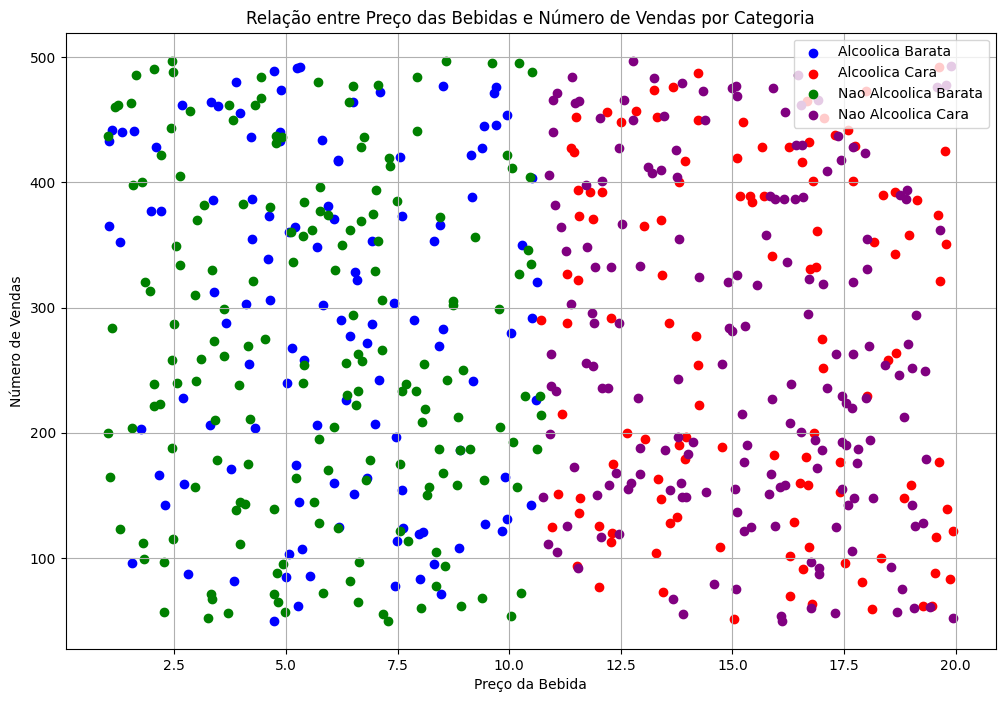

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Filtrando as categorias conforme especificado
df_alcoolica_barata = df[(df['Tipo_Bebida'] == 'Alcoolica') & (df['Categoria'] == 'Alcoolica Barata')]
df_alcoolica_cara = df[(df['Tipo_Bebida'] == 'Alcoolica') & (df['Categoria'] == 'Alcoolica Cara')]
df_nao_alcoolica_barata = df[(df['Tipo_Bebida'] == 'Nao Alcoolica') & (df['Categoria'] == 'Nao Alcoolica Barata')]
df_nao_alcoolica_cara = df[(df['Tipo_Bebida'] == 'Nao Alcoolica') & (df['Categoria'] == 'Nao Alcoolica Cara')]

# Configurações gerais do gráfico
plt.figure(figsize=(12, 8))

# Plot para Alcoólica Barata
plt.scatter(df_alcoolica_barata['Preco_Bebida'], df_alcoolica_barata['Numero_Vendas'], color='blue', label='Alcoolica Barata')
# Plot para Alcoólica Cara
plt.scatter(df_alcoolica_cara['Preco_Bebida'], df_alcoolica_cara['Numero_Vendas'], color='red', label='Alcoolica Cara')
# Plot para Não Alcoólica Barata
plt.scatter(df_nao_alcoolica_barata['Preco_Bebida'], df_nao_alcoolica_barata['Numero_Vendas'], color='green', label='Nao Alcoolica Barata')
# Plot para Não Alcoólica Cara
plt.scatter(df_nao_alcoolica_cara['Preco_Bebida'], df_nao_alcoolica_cara['Numero_Vendas'], color='purple', label='Nao Alcoolica Cara')

# Personalização do gráfico
plt.title('Relação entre Preço das Bebidas e Número de Vendas por Categoria')
plt.xlabel('Preço da Bebida')
plt.ylabel('Número de Vendas')
plt.legend()
plt.grid(True)
plt.show()